<a href="https://www.kaggle.com/code/sanjay277/us-mothers-baby-birth-analysis-linear-regression?scriptVersionId=132144460" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

<p style="border:3px black solid;border-radius:10px;background-color:pink;font-size:40px;font-weight:bold;padding:12px;text-align:center">US Mothers and Baby Birth Analysis | Simple Linear Regression</p>
<p><center style="color:#159364; font-family:cursive; font-size:20px;">Thanks for visiting my notebook </center></p>

***

<center><img src='https://media0.giphy.com/media/pkqnVgAiYQx2w/giphy.gif?cid=ecf05e47kkwkgnapacioq4xpncywsl0wh7q0xttc81xk96hj&ep=v1_gifs_search&rid=giphy.gif&ct=g' height=200px width=300px></center>


# 👋Thanks for Visting my Notebook
<div class="alert alert-block alert-info"style="background-color:#E6E6FA; font-size:20px; font-family:verdana;">
    📌 Feel free to fork or edit the notebook for your own convenience. If you liked the notebook, consider upvoting. It helps other people discover the notebook as well. Your support inspires me to produce more of these kernel.😊
</div>

# 🔬Overview 

<div style="background-color:#E6E6FA; padding: 20px;">
<p style="font-size:20px; font-family:verdana; line-height: 1.7em">The dataset provides birth rates and related data across the 50 states and DC from 2016 to 2021. The data includes detailed information such as number of births, gender, birth weight, state, and year of the delivery. A particular emphasis is given to detailed information on the mother's educational level.The Notebook contains EDA on different variable with geographical visualisation and Simple Linear Regression</p>



In [1]:
#credits https://www.kaggle.com/code/danbraswell/us-birth-weights-vary-with-mothers-education-level
# Very simple custom CSS style.
# Only the h4 and h4.tan tags are used in this notebook.
# The lightblue for section labels or introducing a block of code,
# and the tan version for commenting on results.

from IPython.core.display import HTML

custom_css = """
<style>
h3,h4,h5,h6 {
  display:inline-block;
  color:black;
  background-color:#D8BFD8;
  text-align:left;
}
}
h3 {
  padding:8px;
}
h4 {
  padding:6px;
}
h4.tan {
  background-color:#FFD1DC;
}
h5 {
  padding:4px;
}
h6 {
  padding:2px;
}

</style>"""

HTML(custom_css)


<div style="background-color:#77DDA8; padding:20px; border-radius:5px;">
    <h2 style="color:white; font-weight:bold; text-align:center;">Importing Required Libraries</h2>
</div>

# 1. Importing Required Libraries

In [2]:
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split

import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots


<div style="background-color:#77DDA8; padding:20px; border-radius:5px;">
    <h2 style="color:white; font-weight:bold; text-align:center;">Loading Dataset</h2>
</div>

# 2. Loading Dataset

In [3]:
df=pd.read_csv('/kaggle/input/temporary-us-births/us_births_2016_2021.csv')
df.head()

,State,State Abbreviation,Year,Gender,Education Level of Mother,Education Level Code,Number of Births,Average Age of Mother (years),Average Birth Weight (g)
0,Alabama,AL,2016,F,8th grade or less,1,1052,27.8,3116.9
1,Alabama,AL,2016,F,9th through 12th grade with no diploma,2,3436,24.1,3040.0
2,Alabama,AL,2016,F,High school graduate or GED completed,3,8777,25.4,3080.0
3,Alabama,AL,2016,F,"Some college credit, but not a degree",4,6453,26.7,3121.9
4,Alabama,AL,2016,F,"Associate degree (AA, AS)",5,2227,28.9,3174.3


In [4]:
df.columns=df.columns.str.lower()

In [5]:
df['average birth weight (g)']=(df['average birth weight (g)']/1000).round(2) #converting to kg
df=df.rename(columns={'state':'st',
                              'state abbreviation':'st_ab',
                             'education level of mother':'ed_mother',
                             'education level code':'ed_code',
                             'number of births':'num_births',
                              'average age of mother (years)':'avg_age_mother',
                              'average birth weight (g)':'avg_birth_weight'
                             })

In [6]:
df.isnull().sum()

st                  0
st_ab               0
year                0
gender              0
ed_mother           0
ed_code             0
num_births          0
avg_age_mother      0
avg_birth_weight    0
dtype: int64

In [7]:
print('Number of Duplicated values = ',df.duplicated().sum())

Number of Duplicated values =  0


<div style="background-color:#77DDA8; padding:20px; border-radius:5px;">
    <h2 style="color:white; font-weight:bold; text-align:center;">Exploratory Data Analysis</h2>
</div>

# Exploratory Data Analysis

### Correlation-Heatmap

<AxesSubplot: >

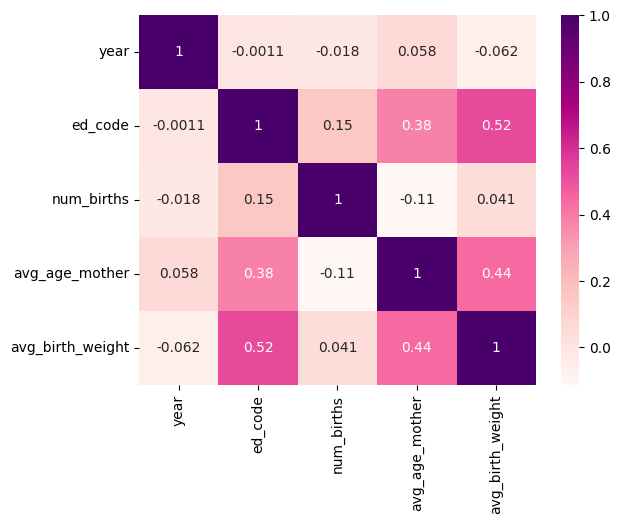

In [8]:
sns.heatmap(df.corr(),annot=True,cmap='RdPu')

In [9]:
for i in range(16, 22):
    df_name = f"df{i}_mean"
    j=2000+i
    globals()[df_name] = df[df['year']==j]  # Create an empty DataFrame

merged_df = pd.DataFrame()  # Create an empty DataFrame for merging

for i in range(16, 22):
    dfss = globals()[f"df{i}_mean"]  # Get the DataFrame dynamically
    df_mean = dfss.groupby('gender')['num_births'].mean().round().reset_index()
    df_mean['year']=2000+i
    merged_df = pd.concat([merged_df, df_mean], ignore_index=True)


<div style="background-color:#77DDA8; padding:20px; border-radius:5px;">
    <h2 style="color:white; font-weight:bold; text-align:center;">Comparing Average Male vs Female births in each year</h2>
</div>

# 3.1 Comparing Average Male vs Female births in each year

In [10]:
fig=px.bar(merged_df,x='year',y='num_births',
           color='gender',barmode='group', 
           color_discrete_map={'M': 'purple', 'F': 'pink'})

fig.update_layout(title_text='Avg Male vs Female Child Births',
                  template='simple_white')
fig.show()


### Male Births have been more than the female births from 2016-2021 in each year

<div style="background-color:#77DDA8; padding:20px; border-radius:5px;">
    <h2 style="color:white; font-weight:bold; text-align:center;">Pie Chart representation of Total Male vs Female births(2016-2021)</h2>
</div>

# 3.2 Pie chart representation of Total Male vs Female Births(2016-2021)

In [11]:
gen_count=df.groupby('gender')['num_births'].sum().reset_index()
fig=px.pie(gen_count,color='gender',names='gender',values='num_births',color_discrete_map={'M': 'purple', 'F': 'pink'})
fig.update_layout(title_text='Total Male vs Female Births(2016-2021)',
                  template='simple_white')
fig.show()

<div style="background-color:#77DDA8; padding:20px; border-radius:5px;">
    <h2 style="color:white; font-weight:bold; text-align:center;">Geographical Analysis-Total Births(2016-2021)</h2>
</div>

# 4.1 Geographical Analysis-Total Births(2016-2021)

In [12]:
import json

df_births=df.groupby(['st','st_ab'])[['num_births']].sum().round().reset_index()
# Load data
data = json.load(open("../input/usa-states-geojson/us-states.json",'r'))

fig = px.choropleth(df_births,
                    locations='st_ab',
                    scope='usa',
                    color='num_births',
                    title='Averaged over all gender and years(2016-2021)-Total births across states',
                    hover_name='st',
                    color_continuous_scale="RdPu",
                    geojson=data)
fig.show()


### Choropleth Map visualises total births including male and females together from 2016-2021 in every state of US

<div style="background-color:#77DDA8; padding:20px; border-radius:5px;">
    <h2 style="color:white; font-weight:bold; text-align:center;">Degree Graduate Mothers vs Non Graduate Mothers</h2>
</div>

# 4.2 Degree Graduate Mothers vs Non Graduate Mothers

In [13]:
grads=df.query('ed_code>=5 and ed_code!=-9').groupby(['st','st_ab'])\
['num_births'].sum().reset_index(name='degree_holders')
not_grads=df.query('ed_code<5').groupby(['st','st_ab'])\
['num_births'].sum().reset_index(name='non_degree_holders')

# Load data
data = json.load(open("../input/usa-states-geojson/us-states.json",'r'))

fig = px.choropleth(grads,
                    locations='st_ab',
                    scope='usa',
                    color='degree_holders',
                    title='Graduate Mothers',
                    hover_name='st',
                    #range_color=(28,32),
                    color_continuous_scale="RdPu",
                    geojson=data)

fig2 = px.choropleth(not_grads,
                    locations='st_ab',
                    scope='usa',
                    color='non_degree_holders',
                    title='Non Graduate Mothers',
                    hover_name='st',
                    color_continuous_scale="RdPu",
                    geojson=data)


fig.show()
fig2.show()

### Mothers with Associate,bachelor's,Masters Degrees and Doctorate are considered graduates and non graduates are people who don't fall into this category

<div style="background-color:#77DDA8; padding:20px; border-radius:5px;">
    <h2 style="color:white; font-weight:bold; text-align:center;">Average Baby Births by Mother's Education Level</h2>
</div>

# 5.1 Average Baby Births by Mother's Education Level

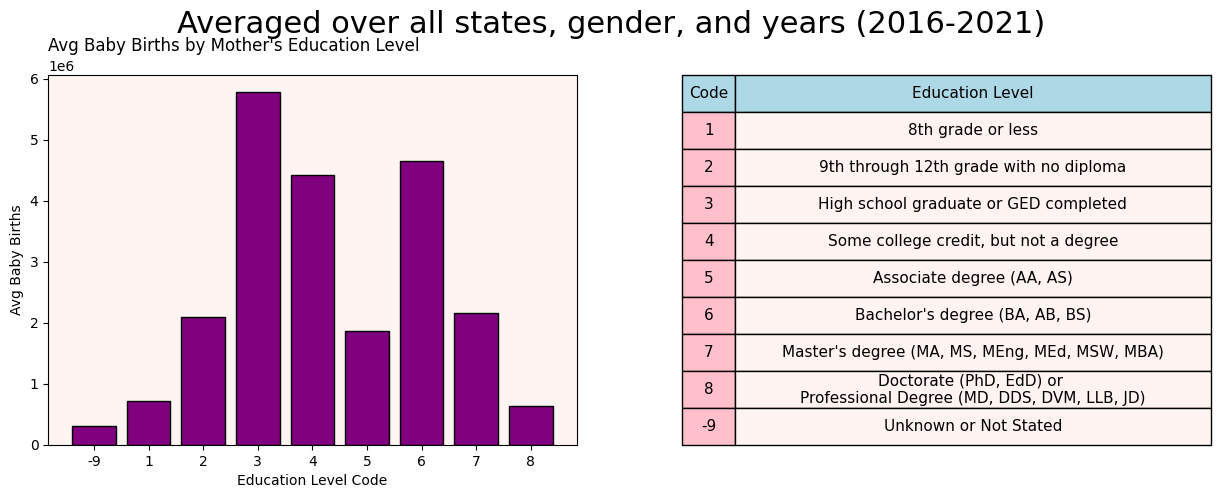

In [14]:
#credits https://www.kaggle.com/code/danbraswell/us-birth-weights-vary-with-mothers-education-level
fig,(ax1,ax2) = plt.subplots(1,2,figsize=(15,5),facecolor="#FFFFFF")
FACECOLOR = 'xkcd:very light pink'


a=df.groupby('ed_code')['num_births'].sum().reset_index()

#-9 in x axis create a problem
edu_codes=a['ed_code'].unique()
edu_codes_str = list( map(str,edu_codes) )

#ax1.grid(axis='y',zorder=0)
ax1.bar(edu_codes_str,a['num_births'],color='purple',edgecolor="black")
ax1.set_facecolor(FACECOLOR)
#ax1.set_ylim([3,5])
ax1.set_xlabel("Education Level Code")
ax1.set_ylabel("Avg Baby Births")
ax1.set_title("Avg Baby Births by Mother's Education Level",loc='left') 

# Create table beside the plot to serve as legend. Use matplotlib table method.
table_cells = np.array([df['ed_code'].unique(),
                        df["ed_mother"].unique()]).transpose()

# Level 8 string (PhD etc) is too long, insert a line break.
table_cells[7,1] = 'Doctorate (PhD, EdD) or \nProfessional Degree (MD, DDS, DVM, LLB, JD)'

table_headers = ["Code","Education Level"]
cell_colors = np.array([["pink"]*9,[FACECOLOR]*9]).transpose()
col_header_colors = ["lightblue"]*2

table = ax2.table(cellText=table_cells,colLabels=table_headers,colWidths=[0.1,0.9],cellColours=cell_colors,
                  cellLoc='center',colColours=col_header_colors,bbox=[0,0,1,1])
table.set_fontsize(22)
ax2.axis('off')
fig.suptitle("Averaged over all states, gender, and years (2016-2021)",fontsize=22)
plt.subplots_adjust(top=0.85)

plt.show()

<div style="background-color:#77DDA8; padding:20px; border-radius:5px;">
    <h2 style="color:white; font-weight:bold; text-align:center;">Average Birth Weight by Mother's Education Level</h2>
</div>

# 5.2 Avg Birth Weight by Mother's Education Level 

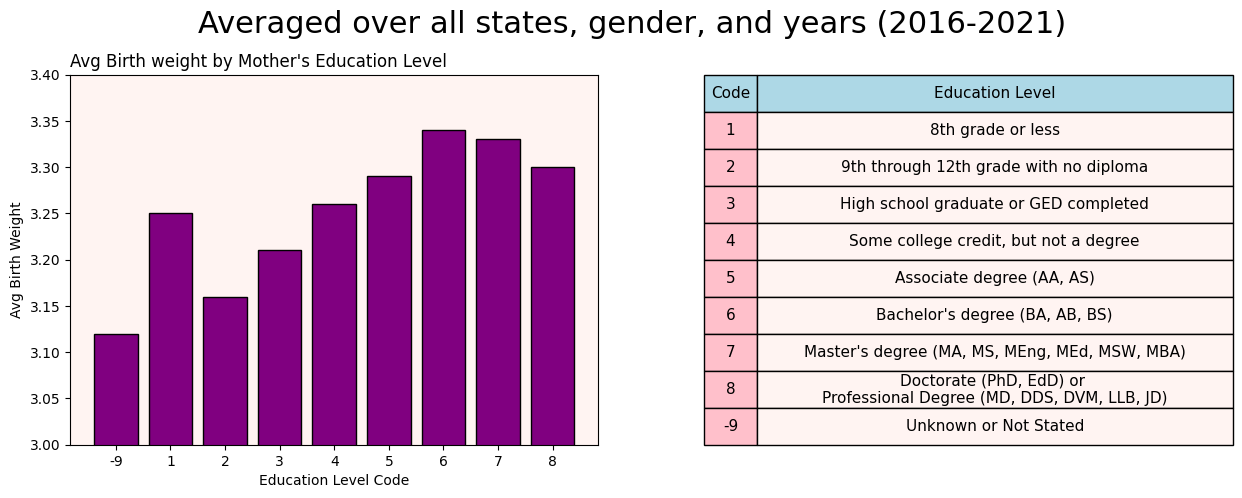

In [15]:
#credits https://www.kaggle.com/code/danbraswell/us-birth-weights-vary-with-mothers-education-level
fig,(ax1,ax2) = plt.subplots(1,2,figsize=(15,5),facecolor="#FFFFFF")
FACECOLOR = 'xkcd:very light pink'

b=df.groupby('ed_code')['avg_birth_weight'].mean().reset_index().round(2)

#ax1.grid(axis='y',zorder=0)
ax1.bar(edu_codes_str,b['avg_birth_weight'],color='purple',edgecolor="black")
ax1.set_facecolor(FACECOLOR)
ax1.set_ylim([3.0,3.4])
ax1.set_xlabel("Education Level Code")
ax1.set_ylabel("Avg Birth Weight")
ax1.set_title("Avg Birth weight by Mother's Education Level",loc='left') 

# Create table beside the plot to serve as legend. Use matplotlib table method.
table_cells = np.array([df['ed_code'].unique(),
                        df["ed_mother"].unique()]).transpose()

# Level 8 string (PhD etc) is too long, insert a line break.
table_cells[7,1] = 'Doctorate (PhD, EdD) or \nProfessional Degree (MD, DDS, DVM, LLB, JD)'

table_headers = ["Code","Education Level"]
cell_colors = np.array([["pink"]*9,[FACECOLOR]*9]).transpose()
col_header_colors = ["lightblue"]*2

table = ax2.table(cellText=table_cells,colLabels=table_headers,colWidths=[0.1,0.9],cellColours=cell_colors,
                  cellLoc='center',colColours=col_header_colors,bbox=[0,0,1,1])
table.set_fontsize(22)
ax2.axis('off')
fig.suptitle("Averaged over all states, gender, and years (2016-2021)",fontsize=22)
plt.subplots_adjust(top=0.85)

plt.show()

#### Note these weight differences are very small. We've zoomed in on the tops of the bars to highlight the differences. After the first level, we see an upward trend in birth weight with education level, peaking with a BS degree (level 6). For education beyond a BS, the birth weight is decreasing. The average birth weight for the "Unkown" category seems to indicate those mothers are most likely from the level 2 or 3 group.

<div style="background-color:#77DDA8; padding:20px; border-radius:5px;">
    <h2 style="color:white; font-weight:bold; text-align:center;">Average Birth Weight by Mother's Education Level | Male vs Female</h2>
</div>

# 5.3 Avg Birth Weight by Mother's Education Level | Male vs Female

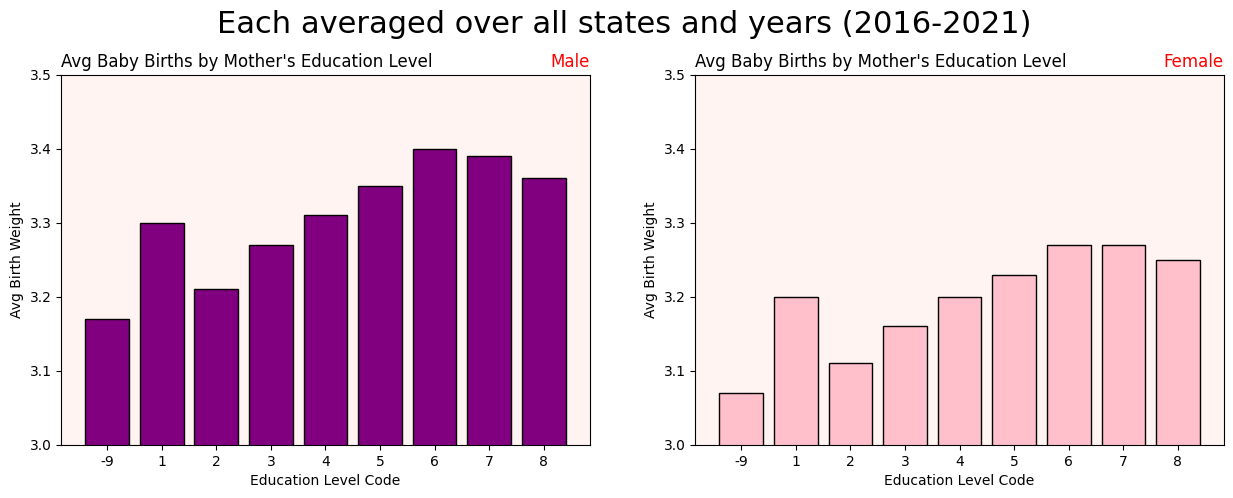

In [16]:
#credits https://www.kaggle.com/code/danbraswell/us-birth-weights-vary-with-mothers-education-level
fig,(ax1,ax2) = plt.subplots(1,2,figsize=(15,5),facecolor="#FFFFFF")
FACECOLOR = 'xkcd:very light pink'

df_m=df.query('gender=="M"').groupby('ed_code')['avg_birth_weight'].mean().reset_index().round(2)
df_f=df.query('gender=="F"').groupby('ed_code')['avg_birth_weight'].mean().reset_index().round(2)

#ax1.grid(axis='y',zorder=0)
ax1.bar(edu_codes_str,df_m['avg_birth_weight'],color='purple',edgecolor="black")
ax1.set_facecolor(FACECOLOR)
ax1.set_ylim([3.0,3.5])
ax1.set_xlabel("Education Level Code")
ax1.set_ylabel("Avg Birth Weight")
ax1.set_title("Avg Baby Births by Mother's Education Level",loc='left') 
ax1.set_title("Male",loc='right',color='red')

#ax1.grid(axis='y',zorder=0)
ax2.bar(edu_codes_str,df_f['avg_birth_weight'],color='pink',edgecolor="black")
ax2.set_facecolor(FACECOLOR)
ax2.set_ylim([3.0,3.5])
ax2.set_xlabel("Education Level Code")
ax2.set_ylabel("Avg Birth Weight")
ax2.set_title("Avg Baby Births by Mother's Education Level",loc='left')
ax2.set_title("Female",loc='right',color='red')

fig.suptitle("Each averaged over all states and years (2016-2021)",fontsize=22)
plt.subplots_adjust(top=0.85)
plt.show()


####  On Average, boy birth weights are greater than girl birth weights. 

#### After the first level, there is an upward trend in birth weight with education level, peaking with a BS degree. Birth weights switch to a downward trend as education level further increases.


In [17]:
gender_mapping = {'M': 0, 'F': 1}
df['gender_code'] = df['gender'].map(gender_mapping)

In [18]:
#creating dataframe for linear model
mod_df=df[['ed_code','avg_birth_weight']]
mod_df=mod_df[mod_df['ed_code']!=-9]

<div style="background-color:#77DDA8; padding:20px; border-radius:5px;">
    <h2 style="color:white; font-weight:bold; text-align:center;">Finding Outliets - Boxplot</h2>
</div>

# 6. Finding Outliers - Boxplot

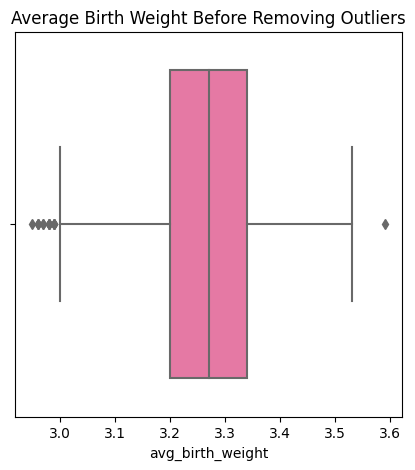

In [19]:
plt.figure(figsize=(5, 5))
# Plotting the second boxplot
sns.boxplot(x='avg_birth_weight',palette='RdPu',data=mod_df)
plt.title('Average Birth Weight Before Removing Outliers')

# Display the plot
plt.show()

In [20]:
#Removing Outliers Using InterQuantileRange(IQR)
q1=mod_df['avg_birth_weight'].quantile(0.25)
q3=mod_df['avg_birth_weight'].quantile(0.75)
iqr=q3-q1
lower_range=round(q1-1.5*iqr,2) #Values below lower_range are outliers
upper_range=round(q3+1.5*iqr,2) #Values above upper_range are outliers

mod_df_filt=mod_df.loc[(mod_df['avg_birth_weight'] < upper_range) & (mod_df['avg_birth_weight'] > lower_range)]

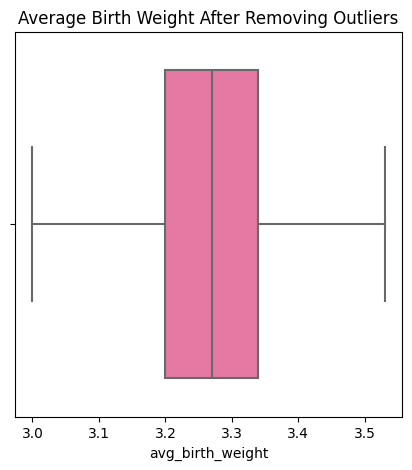

In [21]:
plt.figure(figsize=(5, 5))
# Plotting the second boxplot
sns.boxplot(x='avg_birth_weight', data=mod_df_filt,palette='RdPu')
plt.title('Average Birth Weight After Removing Outliers')

# Display the plot
plt.show()

In [22]:
y=mod_df_filt['ed_code']
x=mod_df_filt[['avg_birth_weight']]

<div style="background-color:#77DDA8; padding:20px; border-radius:5px;">
    <h2 style="color:white; font-weight:bold; text-align:center;">Train Test Split Method</h2>
</div>

# 7. Train Test Split Method

In [23]:
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size = 0.7, test_size = 0.3, random_state = 100)

In [24]:
# Converting y_train & y_test into same shape
y_train = y_train.values.reshape(-1, 1)
y_test = y_test.values.reshape(-1, 1)

<div style="background-color:#77DDA8; padding:20px; border-radius:5px;">
    <h2 style="color:white; font-weight:bold; text-align:center;">Building Linear Model</h2>
</div>

# 8. Building Linear Model

In [25]:
#Credits https://www.kaggle.com/code/ashydv/sales-prediction-simple-linear-regression
import statsmodels.api as sm

x_train_sm=sm.add_constant(x_train)
# Fit the resgression line using 'OLS'
lr = sm.OLS(y_train, x_train_sm).fit()

In [26]:
lr.params

const              -29.216946
avg_birth_weight    10.322634
dtype: float64

In [27]:
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.199
Model:                            OLS   Adj. R-squared:                  0.199
Method:                 Least Squares   F-statistic:                     848.6
Date:                Sat, 03 Jun 2023   Prob (F-statistic):          8.22e-167
Time:                        16:42:39   Log-Likelihood:                -7298.4
No. Observations:                3416   AIC:                         1.460e+04
Df Residuals:                    3414   BIC:                         1.461e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const              -29.2169      1.158  

<h4 class='tan'> Key statistics from the summary </h4>

##### 1.The coeff for `avg_birth_weight` is 10.3226 

##### 2.R-squared is 0.199 | avg_birth_weight explain 19.9% variance in ed_code


##### 3.F statistic is 848.6

##### 4.P value is 0

In [28]:
lr.params

const              -29.216946
avg_birth_weight    10.322634
dtype: float64

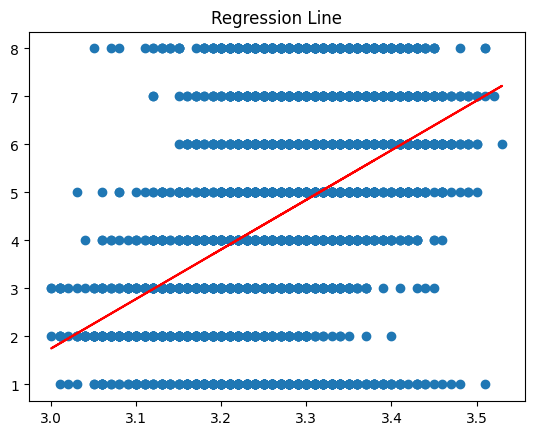

In [29]:
plt.scatter(x_train,y_train)
plt.plot(x_train,-29.216946+10.322634*x_train,'r')
plt.title('Regression Line')
plt.show()

In [30]:
y_train_pred = lr.predict(x_train_sm)
y_train_pred = y_train_pred.values.reshape(-1, 1)
res = (y_train - y_train_pred)

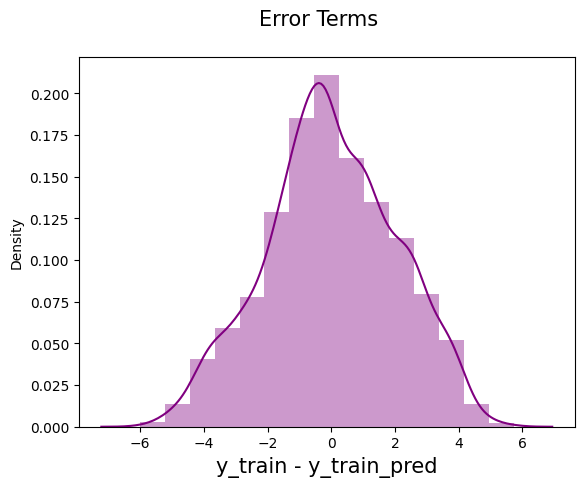

In [31]:
fig = plt.figure()
sns.distplot(res, bins = 15,color='purple')
fig.suptitle('Error Terms', fontsize = 15)                  # Plot heading 
plt.xlabel('y_train - y_train_pred', fontsize = 15)         # X-label
plt.show()



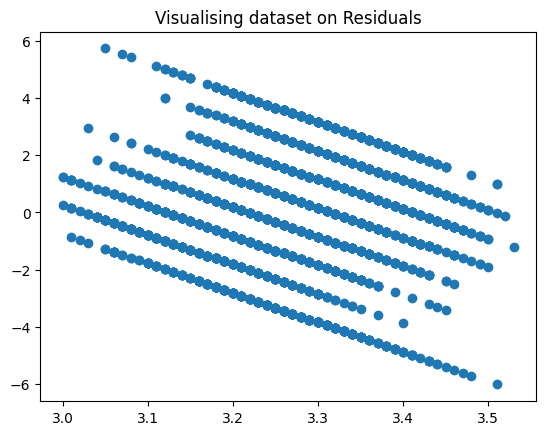

In [32]:
plt.scatter(x_train,res)
plt.title('Visualising dataset on Residuals')
plt.show()

In [33]:
# Add a constant to X_test
x_test_sm = sm.add_constant(x_test)

# Predict the y values corresponding to X_test_sm
y_pred = lr.predict(x_test_sm)

In [34]:
y_pred.head()

1756    4.021936
3018    3.918710
963     4.847747
4888    4.331615
434     4.228389
dtype: float64

In [35]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
#Returns the mean squared error; we'll take a square root
np.sqrt(mean_squared_error(y_test, y_pred))


2.055898555915437

In [36]:
r_squared = r2_score(y_test, y_pred)
r_squared

0.19522457872711096

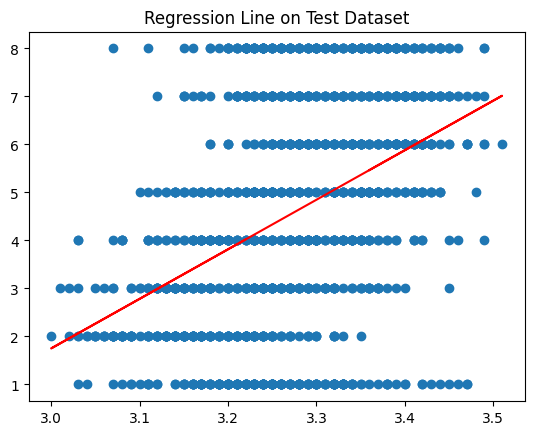

In [37]:
plt.scatter(x_test,y_test)
plt.plot(x_test,-29.216946+10.322634*x_test,'r')
plt.title('Regression Line on Test Dataset')
plt.show()

***
<div style="display: flex;
            align-items: center;
            justify-content: center;
            border-radius: 5px;
            background-color: #5642C5;
            font-size: 110%;
            font-family: Verdana;
            letter-spacing: 0.5px;
            color: white;">
    <p style="padding: 10px;">
        Thanks for viewing my work. If you like it, consider sharing it with others or give feedback to improve the notebook. Have a beautiful day.
    </p>
</div>

<center><img src='https://media0.giphy.com/media/3o7budMRwZvNGJ3pyE/giphy.gif?cid=ecf05e47yemlqqo3kc0n8u7wra97vju0h67uixrqfqpq6yjx&ep=v1_gifs_search&rid=giphy.gif&ct=g' 
     height=30px width=250px font=50px /></center>